## Feature Extraction

### Required Features:
- Color of vehicle
- Type of vehicle
- License plate number
- License plate color

### Strategy:
- Deep Learning
- Histogram for car colors
- Car Type Classification model
- License Plate Detection YOLO model
- License plate parsing using OCR
- Histogram for number plate color colors

In [9]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Read the input image
img = cv2.imread("red_CAr.jpg")
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    print(histr.flatten().sum())

278770.0
278770.0
278770.0


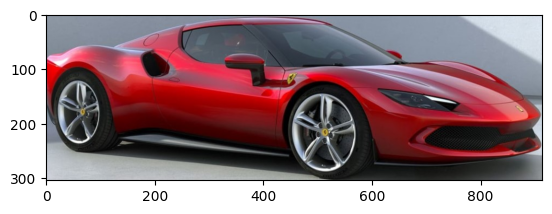

In [15]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()

In [16]:
from colorthief import ColorThief
color_thief = ColorThief('red_CAr.jpg')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
dominant_color

(130, 89, 99)

In [13]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

requested_colour = dominant_color
actual_name, closest_name = get_colour_name(requested_colour)

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

Actual colour name: None , closest colour name: dimgray


In [12]:
from webcolors import rgb_to_name

rgb_to_name(dominant_color)

ValueError: "#825963" has no defined color name in css3.

In [ ]:
# show the plotting graph of an image
plt.plot(histr)
plt.show()